In [1]:
# 回帰診断法について
# 線形回帰モデルは外れ値や等分散性、正規性の仮定が満たされない場合など予測精度が悪化する場合がある
# それらに対する打手として回帰診断を行う

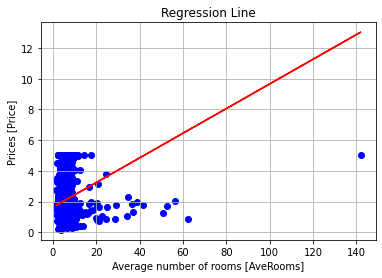

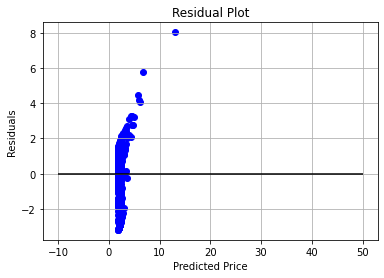

In [19]:
# 残差プロット
# 予測値を横軸、残差を縦軸でプロットする
# 外れ値の存在、等分散性、独立性の有無がわかる

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# データセットを取得
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df['Price'] = housing.target

# 説明変数と目的変数
X = housing_df[['AveRooms']].values
Y = housing_df['Price'].values

# 訓練データと検証データに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0)

# 重回帰分析モデル構築
model = LinearRegression()
model.fit(X_train, Y_train)

# 検証データをで予測
Y_pred = model.predict(X_test)

# 回帰直線をプロット
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'red')
plt.title('Regression Line')
plt.xlabel('Average number of rooms [AveRooms]')
plt.ylabel('Prices [Price]')
plt.grid()
plt.show()   

# 残差プロットの表示
plt.scatter(Y_pred, Y_pred - Y_test, color = 'blue')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid()
plt.show() # 外れ値の存在することがわかる

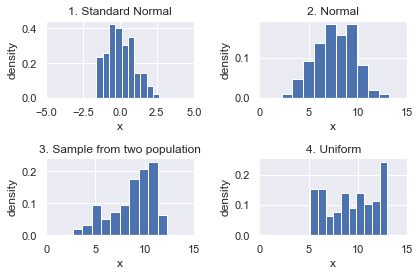

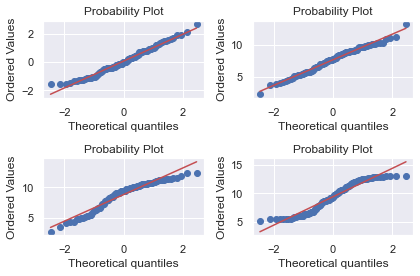

In [23]:
# 正規Q-Qプロット
# 残差を標準化し、小さい順に並べたものの分位点と、標準正規分布の累積分布関数の分位てんをプロットしたもの
# 線形関数の誤差項の正規性の妥当性チェックで使用する

import numpy as np
from scipy.stats import norm
from scipy.stats import probplot
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 標準正規分布に従うサンプル
data1 = norm.rvs(loc=0, scale=1, size=100)

# 正規分布に従うサンプル
data2 = norm.rvs(loc=7.5, scale=2, size=100)

# 2つの母集団からのサンプル
data31 = norm.rvs(loc=10, scale=1, size=70)
data32 = norm.rvs(loc=6, scale=1.5, size=30)
data3 = np.concatenate([data31, data32])

# 一様分布に従うサンプル
data4 = uniform.rvs(loc=5,scale=8,size=100)
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(data1, density=True)
ax[0, 0].set_xlabel('x')
ax[0, 0].set_ylabel('density')
ax[0, 0].set_title('1. Standard Normal')
ax[0, 0].set_xlim(-5, 5)

ax[0, 1].hist(data2, density=True)
ax[0, 1].set_xlabel('x')
ax[0, 1].set_ylabel('density')
ax[0, 1].set_title('2. Normal')
ax[0, 1].set_xlim(0, 15)

ax[1, 0].hist(data3, density=True)
ax[1, 0].set_xlabel('x')
ax[1, 0].set_ylabel('density')
ax[1, 0].set_title('3. Sample from two population')
ax[1, 0].set_xlim(0, 15)

ax[1, 1].hist(data4, density=True)
ax[1, 1].set_xlabel('x')
ax[1, 1].set_ylabel('density')
ax[1, 1].set_title('4. Uniform')
ax[1, 1].set_xlim(0, 15)

plt.tight_layout()
plt.show()

# Q-Qプロットで確認
fig, ax = plt.subplots(2, 2)
probplot(data1, plot=ax[0, 0])
probplot(data2, plot=ax[0, 1])
probplot(data3, plot=ax[1, 0])
probplot(data4, plot=ax[1, 1])
plt.tight_layout()
plt.show() # 正規分布以外は直線に乗らないことが確認できる

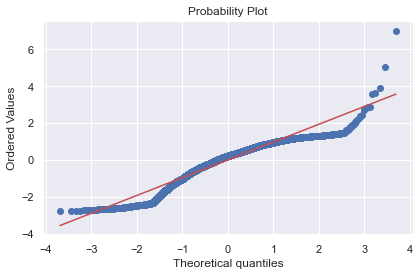

In [32]:
# 残差プロットで使用したデータをQ-Qプロットしてみる
import scipy.stats

# 残差を標準化する
res_std = scipy.stats.zscore(Y_pred - Y_test)

fig, ax = plt.subplots(1, 1)
probplot(res_std, plot=ax)
plt.tight_layout()
plt.show() # 正規性が怪しいことが確認できる

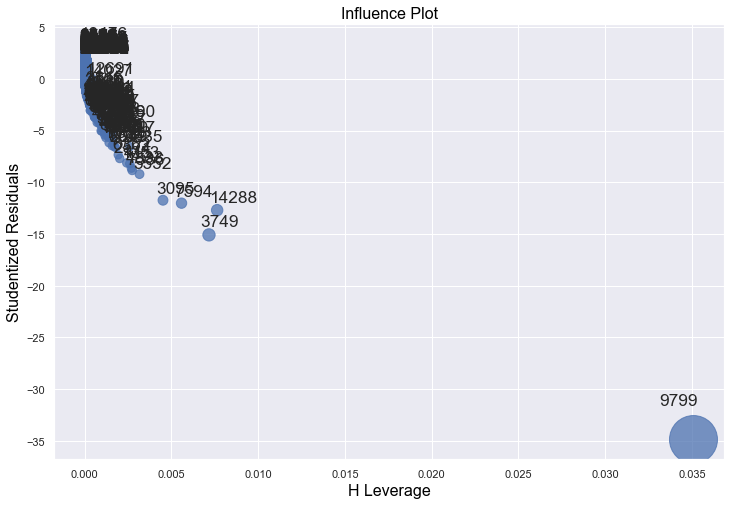

In [36]:
# leverageとCookの距離
# 説明変数の値が極端に大きい場合や小さい場合にleverageは高くなる。モデルへの影響力評価や外れ値候補の選定に使用する

# 残差プロットで使用したデータでCookの距離の計算
import statsmodels.api as sm

ols = sm.OLS(Y_train, X_train)
results = ols.fit()

influence = results.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, alpha  = 0.05, ax = ax, criterion="cooks") # 外れ値を発見(9799)

In [37]:
# 自己相関とDW比
# 残差の独立性の判断で使用する。前後の時間の残差と何らかの規則性が見て取れるかどうか
# 値が2に近いと自己相関なし。0に近いと自己相関あり。4に近いと負の自己相関ありと判断する

# 残差プロットで使用したデータでDW比を計算
from statsmodels.stats.stattools import durbin_watson

ols = sm.OLS(Y_train, X_train)
results = ols.fit()

durbin_watson(results.resid) # 自己相関なし

1.9238143995102701